<a href="https://colab.research.google.com/github/up3082002/DATA-SCIENCE-PROJECTS/blob/main/COmpany_RANKING_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use("ggplot")

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df =pd.read_csv("/content/drucker_inst_company_rankings.csv",sep=",", encoding='cp1252')
df.head()

,ranking,company,customer_satisfaction,employee_engagement_and_development,innovation,social_responsibility,financial_strength,effectiveness
0,1,Microsoft Corp,55.4,72.7,136.2,75.4,88.6,105.5
1,2,Amazon.com Inc,53.6,53.9,155.0,50.2,77.5,94.3
2,3,Apple Inc,57.2,62.2,111.8,67.0,89.3,91.6
3,4,Intl Business Machines Corp,75.4,53.4,115.6,68.9,54.1,88.9
4,5,Intel Corp,62.3,60.5,84.9,75.8,71.6,82.9


In [ ]:
df.shape

(846, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ranking                              846 non-null    int64  
 1   company                              846 non-null    object 
 2   customer_satisfaction                846 non-null    float64
 3   employee_engagement_and_development  846 non-null    float64
 4   innovation                           846 non-null    float64
 5   social_responsibility                846 non-null    float64
 6   financial_strength                   846 non-null    float64
 7   effectiveness                        846 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.0+ KB


In [ ]:
df.isna().sum()

ranking                                0
company                                0
customer_satisfaction                  0
employee_engagement_and_development    0
innovation                             0
social_responsibility                  0
financial_strength                     0
effectiveness                          0
dtype: int64

In [ ]:
df.describe().round(2)

,ranking,customer_satisfaction,employee_engagement_and_development,innovation,social_responsibility,financial_strength,effectiveness
count,846.00,846.00,846.00,846.00,846.00,846.00,846.00
mean,422.23,50.13,49.93,50.17,50.38,50.20,50.25
std,244.22,9.82,9.91,10.14,9.94,9.87,9.99
min,1.00,13.00,3.00,37.10,30.20,15.20,24.90
25%,212.00,44.00,43.50,44.40,42.50,45.10,43.40
50%,422.00,50.00,50.50,47.60,49.70,48.80,48.90
75%,634.00,56.70,56.80,51.88,58.55,54.88,56.10
max,846.00,77.70,76.50,155.00,79.20,89.30,105.50


In [ ]:
df.company.duplicated().sum()

0

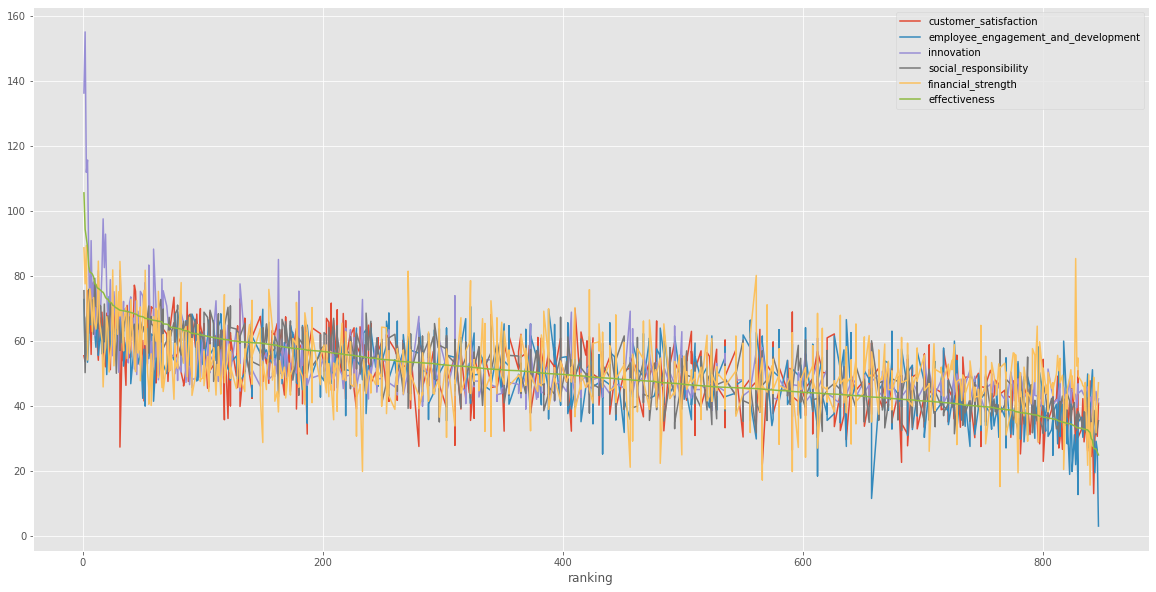

In [ ]:
df.set_index("ranking").plot(figsize=(20,10))

Select the best 5 company and less 5 company depanse on attributes

In [ ]:
top_CS = df.sort_values(by="customer_satisfaction",ascending=False).head(5)
top_CS

,ranking,company,customer_satisfaction,employee_engagement_and_development,innovation,social_responsibility,financial_strength,effectiveness
7,8,Cisco Systems Inc,77.7,66.7,68.7,72.6,62.8,80.5
42,43,Agilent Technologies Inc,77.1,62.3,51.3,65.1,53.9,68.3
3,4,Intl Business Machines Corp,75.4,53.4,115.6,68.9,54.1,88.9
43,44,Caterpillar Inc,75.2,52.7,72.2,56.3,50.5,68.2
75,76,Intl Flavors & Fragrances,73.4,54.1,55.5,65.6,42.0,64.0


In [ ]:
#intrective graph

px.sunburst(top_CS,values="ranking",path=["innovation","social_responsibility","financial_strength","employee_engagement_and_development"],color="company")

In [ ]:
## less  5 company based on customer satisfaction

less5_CS=df.sort_values(by="customer_satisfaction",ascending=True).head(5)
less5_CS

,ranking,company,customer_satisfaction,employee_engagement_and_development,innovation,social_responsibility,financial_strength,effectiveness
841,842,Altice USA Inc-A,13.0,31.7,47.4,34.5,48.8,26.9
568,566,Twitter Inc,22.0,59.6,57.9,46.3,46.1,45.1
681,682,Charter Communications Inc A,22.6,42.1,54.8,49.4,54.0,42.0
800,800,Equifax Inc,22.9,42.7,46.0,43.4,51.6,36.5
839,840,PBF Energy Inc A,24.4,46.1,42.8,34.5,34.8,29.9


In [ ]:
px.sunburst(less5_CS,values="ranking",path=["innovation","social_responsibility","financial_strength","employee_engagement_and_development"],color="company")

In [ ]:
## Best 5 company based on employee engagement and development

top5_EG=df.sort_values(by="employee_engagement_and_development",ascending=False).head(5)
top5_EG

,ranking,company,customer_satisfaction,employee_engagement_and_development,innovation,social_responsibility,financial_strength,effectiveness
5,6,Nvidia Corp,73.3,76.5,65.9,65.2,76.0,81.1
21,22,Salesforce.com,64.4,73.6,67.8,63.1,50.4,72.1
11,12,Adobe Inc,59.8,73.5,65.4,70.3,67.9,76.3
0,1,Microsoft Corp,55.4,72.7,136.2,75.4,88.6,105.5
323,323,Camden Property Trust,48.8,70.5,46.6,46.7,43.8,51.9


In [ ]:
# interactive graph 

px.sunburst(top5_EG,values="ranking",path=["innovation","social_responsibility","financial_strength","employee_engagement_and_development"],color="company")

In [ ]:
## less 5 company based on employee engagement and development

less5_EG=df.sort_values(by="employee_engagement_and_development",ascending=True).head(5)
less5_EG

,ranking,company,customer_satisfaction,employee_engagement_and_development,innovation,social_responsibility,financial_strength,effectiveness
845,846,GMS Inc,40.8,3.0,42.1,35.4,47.1,24.9
661,657,Union Pacific Corp,48.6,11.5,47.5,60.0,56.6,42.7
828,829,MDC Holdings Inc,50.8,12.7,44.0,36.0,54.7,33.2
612,612,Pool Corp,45.0,18.4,60.8,41.6,68.4,43.9
821,822,GameStop Corp A,41.7,18.9,48.4,41.5,48.4,34.5
